# Import Libraries

In [1]:
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

import os

# Gathering Data
- manually download and upload `twitter-archive-enhanced.csv`
- programatically download `image_predictions.tsv` using requests library
- programatically collect `tweet_json.txt` using tweepy API

## Read `twitter-archive-enhanced.csv`

In [2]:
df_tw = pd.read_csv("./twitter-archive-enhanced.csv")
df_tw.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Download Programatically and Read `image_predictions.tsv` 

In [3]:
if os.path.isfile("./image_predictions.tsv"):
    print("Do not write file")
else:
    print("Do write file")
    r = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")
    with open("./image_predictions.tsv",'w') as f:
        f.write(r.text)


Do not write file


In [4]:
df_img = pd.read_csv("./image_predictions.tsv", "\t")
df_img.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


## Get Json Data Using Tweeter API and Read `tweet_json.txt`

In [5]:
API_KEY = "f7l6vCaVlUl4EtyuGXTSjA3GT"
API_SECRET_KEY = "FqlwMcLTkwugF6j53lINh9JKBqkpDGUQlPkFOor4YWKFQohz8e"

ACCESS_TOKEN = "1339802126977888257-Ll0Gc3UdaKeAbwqRz9yct4mZ7RIzuZ"
ACCESS_TOKEN_SECRET = "0Eel6extd5kOmNE6XmPL6d0fy94suoGL2Un09RxdtqDCo"

consumer_key = API_KEY
consumer_secret = API_SECRET_KEY
access_token = ACCESS_TOKEN
access_secret = ACCESS_TOKEN_SECRET

In [6]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

In [7]:
api = tweepy.API(auth, 
                 parser = tweepy.parsers.JSONParser(), 
                 wait_on_rate_limit = True, 
                 wait_on_rate_limit_notify = True)

In [8]:
is_already_downloaded = True
if(not is_already_downloaded):
    #Download Tweepy status object based on Tweet ID and store in list
    list_of_tweets = []
    # Tweets that can't be found are saved in the list below:
    cant_find_tweets_for_those_ids = []
    for tweet_id in df_tw['tweet_id']:   
        try:
            list_of_tweets.append(api.get_status(tweet_id))
        except Exception as e:
            cant_find_tweets_for_those_ids.append(tweet_id)

In [9]:
if(not is_already_downloaded):
    #Printing 
    print("The list of tweets" ,len(list_of_tweets))
    print("The list of tweets no found" , len(cant_find_tweets_for_those_ids))

In [10]:
if(not is_already_downloaded):
    #Then in this code block we isolate the json part of each tweepy 
    #status object that we have downloaded and we add them all into a list
    my_list_of_dicts = []
    for each_json_tweet in list_of_tweets:
        my_list_of_dicts.append(each_json_tweet)

In [11]:
if(not is_already_downloaded):
    #we write this list into a txt file:
    with open('tweet_json.txt', 'w') as file:
            file.write(json.dumps(my_list_of_dicts, indent=4))

In [12]:
if(not is_already_downloaded):
    tweet_ids = df_tw['tweet_id'].values
    len(tweet_ids)

In [13]:
#identify information of interest from JSON dictionaries in txt file
#and put it in a dataframe called tweet JSON
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file: 
    
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        df_ex = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])



In [14]:
df_ex.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34831,7312,9014803,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30173,5461,9014803,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22719,3603,9014803,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38083,7494,9014803,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36350,8054,9014803,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


# Assessing Data

## Quality Issues(required detect and document at least 8 issues)
1. `df_tw`: When manually check the data, `name`, `doggo`, `floofer`, `pupper` and `puppo` columns have None data. But programatically check using info function, then there are no null data.
1. `df_tw`: The'source' column refers to the device or location from which the Tweet was written (e.g. the Tweet was written to iPhone, Web, Deck or Vine).
1. `rating_denominator` have zero value
1. `in_reply_to_status_id` is float, but `id` columns must be intager.
1. `in_reply_to_user_id` is float, but `id` columns must be intager.
1. `p1`, `p2`, `p3`, kind of dogs name, have some duplicated name(lower case and first capitalized case)
1. `create_at`, and `timestamp` column type is object(string). This column type will be changed to `datetime`.
1. Only one data have information of `place` column in `df_ex`
1. `doggo`, `floofer`, `pupper`, and `puppo` columns in `df_tw` data frame chage to one-hot-encoded variable
1. `datetime` columns change to `year`, `month`, `day` and so on.
1. `name` column have some false name like `a`, `O`, `his`, and so on.


### What data and How many data are in `twitter-archive-enhanced.csv`, `image_prediction.tsv`, and `tweet_json.txt` files

In [15]:
print("data columns")
print(f"twitter-archive-enhanced.csv: {df_tw.columns}")
print(f"image_prediction.tsv: {df_img.columns}")
print(f"tweet_json.txt: {df_ex.columns}")

print("\ndata shape")
print(f"twitter-archive-enhanced.csv: {df_tw.shape}")
print(f"image_prediction.tsv: {df_img.shape}")
print(f"tweet_json.txt: {df_ex.shape}")

data columns
twitter-archive-enhanced.csv: Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
image_prediction.tsv: Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')
tweet_json.txt: Index(['tweet_id', 'favorite_count', 'retweet_count', 'followers_count',
       'friends_count', 'source', 'retweeted_status', 'url'],
      dtype='object')

data shape
twitter-archive-enhanced.csv: (2356, 17)
image_prediction.tsv: (2075, 12)
tweet_json.txt: (2331, 8)


### Checking `twitter-archive-enhanced.csv` file programatically and manually

In [16]:
df_tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [17]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

1. `df_tw`: When manually check the data, `name`, `doggo`, `floofer`, `pupper` and `puppo` columns have None data. But programatically check using info function, then there are no null data.

In [18]:
df_tw['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
df_tw['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

2. `df_tw`: The `source` column refers to the device or location from which the Tweet was written (e.g. the Tweet was written to iPhone, Web, Deck or Vine).

In [20]:
df_tw['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

3. `rating_denominator` have zero value

In [21]:
df_tw[df_tw['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [22]:
df_tw.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [23]:
exist_id = df_tw['in_reply_to_status_id'].notnull()
df_tw.loc[exist_id, 'in_reply_to_status_id']

30      8.862664e+17
55      8.816070e+17
64      8.795538e+17
113     8.707262e+17
148     8.634256e+17
            ...     
2038    6.715449e+17
2149    6.693544e+17
2169    6.678065e+17
2189    6.689207e+17
2298    6.670655e+17
Name: in_reply_to_status_id, Length: 78, dtype: float64

4. `in_reply_to_status_id` is float, but `id` columns must be intager.

In [24]:
exist_id = df_tw['in_reply_to_user_id'].notnull()
df_tw.loc[exist_id, 'in_reply_to_user_id']

30      2.281182e+09
55      4.738443e+07
64      3.105441e+09
113     1.648776e+07
148     7.759620e+07
            ...     
2038    4.196984e+09
2149    4.196984e+09
2169    4.196984e+09
2189    2.143566e+07
2298    4.196984e+09
Name: in_reply_to_user_id, Length: 78, dtype: float64

5. `in_reply_to_user_id` is float, but `id` columns must be intager.

In [25]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

Maybe there is no duplicated row in `df_tw`, and `df_img`. `df_ex` cannot check duplicated rows, becuase there is list format in some column

In [26]:
df_img

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [27]:
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [28]:
print(f"p1 dog names: {df_img['p1'].unique().shape}, lower: {df_img['p1'].str.lower().unique().shape}")
print(f"p2 dog names: {df_img['p2'].unique().shape}, lower: {df_img['p2'].str.lower().unique().shape}")
print(f"p3 dog names: {df_img['p3'].unique().shape}, lower: {df_img['p3'].str.lower().unique().shape}")

p1 dog names: (378,), lower: (378,)
p2 dog names: (405,), lower: (404,)
p3 dog names: (408,), lower: (408,)


6 `p1`, `p2`, `p3`, kind of dogs name, have some duplicated name(lower case and first capitalized case)

In [29]:
df_ex.head()

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,34831,7312,9014803,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,30173,5461,9014803,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,22719,3603,9014803,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,38083,7494,9014803,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,36350,8054,9014803,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


7. `create_at` column type is object(string). This column type will be changed to `datetime`.

In [30]:
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          2331 non-null   object
 1   favorite_count    2331 non-null   int64 
 2   retweet_count     2331 non-null   int64 
 3   followers_count   2331 non-null   int64 
 4   friends_count     2331 non-null   int64 
 5   source            2331 non-null   object
 6   retweeted_status  2331 non-null   object
 7   url               2331 non-null   object
dtypes: int64(4), object(4)
memory usage: 145.8+ KB


In [31]:
df_ex['favorite_count'].value_counts()

0        163
410        3
287        3
3539       3
2327       3
        ... 
567        1
10808      1
2618       1
573        1
24559      1
Name: favorite_count, Length: 1969, dtype: int64

In [32]:
df_ex['retweet_count'].value_counts()

349     6
212     6
490     5
433     5
588     4
       ..
333     1
339     1
341     1
2390    1
4098    1
Name: retweet_count, Length: 1681, dtype: int64

In [33]:
df_ex['followers_count'].value_counts()

9014806    471
9014818    300
9014832    255
9014817    202
9014807    167
9014819    166
9014828    116
9014820    109
9014821     96
9014804     77
9014833     75
9014808     60
9014803     57
9014829     56
9014831     33
9014805     32
9014822     15
9014830     12
9014809      9
9014444      5
9014431      5
9014445      3
9014429      3
9014430      2
9014418      2
9014419      2
9014440      1
Name: followers_count, dtype: int64

In [34]:
df_ex['friends_count'].value_counts()

17    2331
Name: friends_count, dtype: int64

8. Only one data have information of `place` column

In [35]:
df_tw.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [36]:
print(df_tw['name'].value_counts(),\
      df_tw['doggo'].value_counts(),\
     df_tw['floofer'].value_counts(),\
     df_tw['pupper'].value_counts(),\
     df_tw['puppo'].value_counts())

None         745
a             55
Charlie       12
Lucy          11
Oliver        11
            ... 
Sandra         1
Spark          1
Shelby         1
Scruffers      1
light          1
Name: name, Length: 957, dtype: int64 None     2259
doggo      97
Name: doggo, dtype: int64 None       2346
floofer      10
Name: floofer, dtype: int64 None      2099
pupper     257
Name: pupper, dtype: int64 None     2326
puppo      30
Name: puppo, dtype: int64


9. `doggo`, `floofer`, `pupper`, and `puppo` columns in `df_tw` data frame chage to one-hot-encoded variable

10. `datetime` columns change to `year`, `month`, `day` and so on.

In [37]:
df_tw['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

11. `name` column have some false name like `a`, `O`, `his`, and so on.
* list = {'a', 'O', 'his', 'getting', 'unacceptable', 'old', 'None', 'quite', 'not', 'mad', 'an', 'very', 'one', 'all', 'this', 'such', just', 'by', 'infuriating', 'light', 'life', 'my', 'the'}

## Tidiness Issues(required detect and document at least 2 issues)
1. `tweet_id` is same column in `df_tw`, `df_img`, and `df_ex`, but `df_ex` is `object` type and others `int64`
1. All data must be merged


In [38]:
df_tw['tweet_id'].dtype,\
df_img['tweet_id'].dtype,\
df_ex['tweet_id'].dtype

(dtype('int64'), dtype('int64'), dtype('O'))

In [39]:
df_ex.sample(3)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2310,666287406224695296,130,57,9014832,17,Twitter for iPhone,Original tweet,https://t.co/d9NcXFKwLv
1206,713411074226274305,4231,1235,9014818,17,Twitter for iPhone,Original tweet,https://t.co/jVJJKlPbvq
28,886366144734445568,19116,2743,9014803,17,Twitter for iPhone,Original tweet,https://t.co/iIu3AF8IWH


In [40]:
df_tw.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1125,730196704625098752,NaN,NaN,2016-05-11 00:43:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charles. He's camera shy. Tail longer ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/730196704...,6,10,Charles,None,None,None,None
797,773191612633579521,NaN,NaN,2016-09-06 16:10:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Grey. He's the dogtor in charge of you...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/773191612...,12,10,Grey,None,None,None,None
701,786051337297522688,7.727430e+17,7.305050e+17,2016-10-12 03:50:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",13/10 for breakdancing puppo @shibbnbot,NaN,NaN,NaN,NaN,13,10,None,None,None,None,puppo


In [41]:
df_img.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
838,694352839993344000,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,2,Australian_terrier,0.407886,True,Yorkshire_terrier,0.328173,True,silky_terrier,0.108404,True
35,666437273139982337,https://pbs.twimg.com/media/CT-pKmRWIAAxUWj.jpg,1,Chihuahua,0.671853,True,beagle,0.124680,True,Saluki,0.044094,True
1531,789599242079838210,https://pbs.twimg.com/media/CvU4UZpXgAE1pAV.jpg,2,Chesapeake_Bay_retriever,0.878822,True,beagle,0.018570,True,Labrador_retriever,0.017499,True


# Cleaning Data

## Setup cleaning value

In [42]:
df_tw_clean = df_tw.copy()
df_ex_clean = df_ex.copy()
df_img_clean = df_img.copy()

## Clean quality issues

1. `df_tw`: When manually check the data, `name`, `doggo`, `floofer`, `pupper` and `puppo` columns have None data. But programatically check using info function, then there are no null data.
* define: "None" data change to NaN value
* code

In [43]:
df_tw_clean.loc[df_tw['name'] == "None", 'name'] = None
df_tw_clean.loc[df_tw['doggo'] == "None", 'doggo'] = None
df_tw_clean.loc[df_tw['floofer'] == "None", 'floofer'] = None
df_tw_clean.loc[df_tw['pupper'] == "None", 'pupper'] = None
df_tw_clean.loc[df_tw['puppo'] == "None", 'puppo'] = None

* valid

In [44]:
print(
    df_tw['name'].isna().sum(),\
    df_tw['doggo'].isna().sum(),\
    df_tw['floofer'].isna().sum(),\
    df_tw['pupper'].isna().sum(),\
    df_tw['puppo'].isna().sum()
    )
print(
    df_tw_clean['name'].isna().sum(),\
    df_tw_clean['doggo'].isna().sum(),\
    df_tw_clean['floofer'].isna().sum(),\
    df_tw_clean['pupper'].isna().sum(),\
    df_tw_clean['puppo'].isna().sum()
    )

df_tw_clean.info()

0 0 0 0 0
745 2259 2346 2099 2326
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13 

2. `df_tw`: The `source` column refers to the device or location from which the Tweet was written (e.g. the Tweet was written to iPhone, Web, Deck or Vine).
* define: `source` column change to simple
* code

In [45]:
idx = df_tw_clean['source'].str.find("Twitter for iPhone")
df_tw_clean.loc[idx > 0, 'source'] = "Twitter for iPhone"

idx = df_tw_clean['source'].str.find("Vine - Make a Scene")
df_tw_clean.loc[idx > 0, 'source'] = "Vine - Make a Scene"

idx = df_tw_clean['source'].str.find("Twitter Web Client")
df_tw_clean.loc[idx > 0, 'source'] = "Twitter Web Client"

idx = df_tw_clean['source'].str.find("TweetDeck")
df_tw_clean.loc[idx > 0, 'source'] = "TweetDeck"

In [46]:
df_tw['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [47]:
df_tw_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

3. `df_tw`: `rating_denominator` have zero value
* define: `rating_denominator` value at least 1.
* code:

In [48]:
df_tw_clean.loc[df_tw_clean['rating_denominator'] == 0, 'rating_denominator'] = 1

* valid: 

In [49]:
df_tw_clean['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
15        1
16        1
40        1
70        1
90        1
110       1
120       1
130       1
150       1
170       1
1         1
7         1
2         1
Name: rating_denominator, dtype: int64

4. `df_tw`: `in_reply_to_status_id` is float, but `id` columns must be not float(it can be string or intager).
* define: `in_reply_to_status_id` change to intager value
* code:

In [50]:
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'] = \
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'].astype('int64').astype('str')

* valid

In [51]:
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'].head()

30     886266357075128320
55     881607037314052096
64     879553827334172672
113    870726202742493184
148    863425645568774144
Name: in_reply_to_status_id, dtype: object

5. `in_reply_to_user_id` is float, but id columns must be not float(it can be string or intager).
* define: `in_reply_to_user_id` change to intager value
* code:

In [52]:
df_tw_clean.loc[df_tw_clean['in_reply_to_user_id'].notnull(), 'in_reply_to_user_id'] = \
df_tw_clean.loc[df_tw_clean['in_reply_to_user_id'].notnull(), 'in_reply_to_user_id'].astype('int64').astype('str')

* valid

In [53]:
df_tw_clean.loc[df_tw_clean['in_reply_to_user_id'].notnull(), 'in_reply_to_user_id'].head()

30     2281181600
55       47384430
64     3105440746
113      16487760
148      77596200
Name: in_reply_to_user_id, dtype: object

4. `df_tw`: `in_reply_to_status_id` is float, but `id` columns must be not float(it can be string or intager).
* define: `in_reply_to_status_id` change to intager value
* code:

In [54]:
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'] = \
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'].astype('int64').astype('str')

* valid

In [55]:
df_tw_clean.loc[df_tw_clean['in_reply_to_status_id'].notnull(), 'in_reply_to_status_id'].head()

30     886266357075128320
55     881607037314052096
64     879553827334172672
113    870726202742493184
148    863425645568774144
Name: in_reply_to_status_id, dtype: object

6. `df_img`: `p1`, `p2`, `p3`, kind of dogs name, have some duplicated name(lower case and first capitalized case)
* define: dog names change to lower case
* code:

In [56]:
df_img_clean['p1'] = df_img_clean['p1'].str.lower()
df_img_clean['p2'] = df_img_clean['p2'].str.lower()
df_img_clean['p3'] = df_img_clean['p3'].str.lower()

* valid: 

In [57]:
df_img_clean['p1'].unique(), df_img_clean['p2'].unique(), df_img_clean['p3'].unique()

(array(['welsh_springer_spaniel', 'redbone', 'german_shepherd',
        'rhodesian_ridgeback', 'miniature_pinscher',
        'bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
        'miniature_poodle', 'golden_retriever', 'gordon_setter',
        'walker_hound', 'pug', 'bloodhound', 'lhasa', 'english_setter',
        'hen', 'desktop_computer', 'italian_greyhound', 'maltese_dog',
        'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
        'soft-coated_wheaten_terrier', 'chihuahua',
        'black-and-tan_coonhound', 'coho', 'toy_terrier',
        'blenheim_spaniel', 'pembroke', 'llama',
        'chesapeake_bay_retriever', 'curly-coated_retriever', 'dalmatian',
        'ibizan_hound', 'border_collie', 'labrador_retriever', 'seat_belt',
        'snail', 'miniature_schnauzer', 'airedale', 'triceratops', 'swab',
        'hay', 'hyena', 'jigsaw_puzzle', 'west_highland_white_terrier',
        'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'rottweiler',
        'sib

7. `created_at`, and `timestamp` column type is object(string). This column type will be changed to `datetime`.

* define: `created_at`, and `timestamp` columns change to `datetime` in `pandas`
* code: 

In [58]:
df_tw_clean['timestamp'] = pd.to_datetime(df_tw_clean['timestamp'])
df_tw_clean['retweeted_status_timestamp'] = pd.to_datetime(df_tw_clean['retweeted_status_timestamp'])

* valid

In [59]:
df_tw_clean['timestamp'].dtype, df_tw_clean['retweeted_status_timestamp'].dtype

(datetime64[ns, UTC], datetime64[ns, UTC])

9. `doggo`, `floofer`, `pupper`, and `puppo` columns in `df_tw` data frame chage to one-hot-encoded variable
* define: Value in `doggo`, `floofer`, `pupper`, and `puppo` columns change from string to true or false
* code:

In [60]:
df_tw_clean['doggo'] = df_tw['doggo'] == 'doggo'
df_tw_clean['floofer'] = df_tw['floofer'] == 'floofer'
df_tw_clean['pupper'] = df_tw['pupper'] == 'pupper'
df_tw_clean['puppo'] = df_tw['puppo'] == 'puppo'

* valid:

In [61]:
print(df_tw_clean['doggo'].value_counts(),\
     df_tw_clean['floofer'].value_counts(),\
     df_tw_clean['pupper'].value_counts(),\
     df_tw_clean['puppo'].value_counts())

print(df_tw['doggo'].value_counts(),\
     df_tw['floofer'].value_counts(),\
     df_tw['pupper'].value_counts(),\
     df_tw['puppo'].value_counts())

False    2259
True       97
Name: doggo, dtype: int64 False    2346
True       10
Name: floofer, dtype: int64 False    2099
True      257
Name: pupper, dtype: int64 False    2326
True       30
Name: puppo, dtype: int64
None     2259
doggo      97
Name: doggo, dtype: int64 None       2346
floofer      10
Name: floofer, dtype: int64 None      2099
pupper     257
Name: pupper, dtype: int64 None     2326
puppo      30
Name: puppo, dtype: int64


9 `datetime` columns change to `year`, `month`, `day` and so on.
* define: `datetime` columns change to seperated values
* code:

In [62]:
df_tw_clean['year'] = df_tw_clean['timestamp'].dt.year
df_tw_clean['month'] = df_tw_clean['timestamp'].dt.month
df_tw_clean['day'] = df_tw_clean['timestamp'].dt.day
df_tw_clean['hour'] = df_tw_clean['timestamp'].dt.hour
df_tw_clean['minute'] = df_tw_clean['timestamp'].dt.minute
df_tw_clean['second'] = df_tw_clean['timestamp'].dt.second

In [63]:
df_tw_clean[['timestamp', 'year', 'month', 'day', 'hour', 'minute', 'second']].sample(10)

,timestamp,year,month,day,hour,minute,second
345,2017-02-15 18:54:34+00:00,2017,2,15,18,54,34
2188,2015-11-24 02:13:25+00:00,2015,11,24,2,13,25
77,2017-06-22 03:54:17+00:00,2017,6,22,3,54,17
1255,2016-03-17 23:33:12+00:00,2016,3,17,23,33,12
1574,2016-01-14 03:45:57+00:00,2016,1,14,3,45,57
2146,2015-11-26 16:59:01+00:00,2015,11,26,16,59,1
2312,2015-11-18 00:36:17+00:00,2015,11,18,0,36,17
44,2017-07-09 00:00:04+00:00,2017,7,9,0,0,4
1178,2016-04-11 15:43:12+00:00,2016,4,11,15,43,12
363,2017-02-08 17:00:26+00:00,2017,2,8,17,0,26


10. `name` column have some false name like `a`, `O`, `his`, and so on.
* define: false name change to `None` string
* code

In [64]:
false_name_list = [
    'a', 'O', 'his', 'getting', 'unacceptable', 'old', 'None', 
    'quite', 'not', 'mad', 'an', 'very', 'one', 'all', 'this', 
    'such', 'just', 'by', 'infuriating', 'light', 'life', 'my',
    'the']
df_tw_clean['name'] = df_tw_clean['name'].apply(lambda x: 'None' if x in false_name_list else x)

* valid

In [65]:
set(df_tw['name'].unique()).difference(set(df_tw_clean['name'].unique()))

{'O',
 'a',
 'all',
 'an',
 'by',
 'getting',
 'his',
 'infuriating',
 'just',
 'life',
 'light',
 'mad',
 'my',
 'not',
 'old',
 'one',
 'quite',
 'such',
 'the',
 'this',
 'unacceptable',
 'very'}

## Clean Tidiness Issues

1. `tweet_id` is same column in `df_tw`, `df_img`, and `df_ex`, but `df_ex` is `object` type and others `int64`
* define: `tweet_id` in `df_ex` change to `int64` type
* code:

In [66]:
df_ex_clean['tweet_id'] = df_ex_clean['tweet_id'].astype('int64')

In [67]:
df_tw_clean['tweet_id'], df_img_clean['tweet_id'], df_ex_clean['tweet_id']

(0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2351    666049248165822465
 2352    666044226329800704
 2353    666033412701032449
 2354    666029285002620928
 2355    666020888022790149
 Name: tweet_id, Length: 2356, dtype: int64,
 0       666020888022790149
 1       666029285002620928
 2       666033412701032449
 3       666044226329800704
 4       666049248165822465
                ...        
 2070    891327558926688256
 2071    891689557279858688
 2072    891815181378084864
 2073    892177421306343426
 2074    892420643555336193
 Name: tweet_id, Length: 2075, dtype: int64,
 0       892420643555336193
 1       892177421306343426
 2       891815181378084864
 3       891689557279858688
 4       891327558926688256
                ...        
 2326    666049248165822465
 2327    666044226329800704
 2328    666033412701032449
 2329    666029285002620928
 2330    66602

2. All data must be merged

* define: all data frame merge
* code:

In [68]:
df = df_tw_clean.merge(df_img_clean, how = 'right', on = 'tweet_id')
df = df.merge(df_ex_clean, how = 'right', on = 'tweet_id')

* valid:

In [69]:
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,banana,0.076110,False,34831,7312,9014803,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,papillon,0.068957,True,30173,5461,9014803,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,kelpie,0.031379,True,22719,3603,9014803,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,spatula,0.040836,False,38083,7494,9014803,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,german_short-haired_pointer,0.175219,True,36350,8054,9014803,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


In [70]:
df_cols = df.columns
df_each_cols = [df_tw_clean.columns, df_img_clean.columns, df_ex_clean.columns]

print(df_cols)
print(df_each_cols)
print(df.shape, df_tw_clean.shape, df_img_clean.shape, df_ex_clean.shape)

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source_x', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'jpg_url',
       'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3',
       'p3_conf', 'p3_dog', 'favorite_count', 'retweet_count',
       'followers_count', 'friends_count', 'source_y', 'retweeted_status',
       'url'],
      dtype='object')
[Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'month', 'day', 'hour', 'minute', 'second'],
  

3. Clean data by dropping duplicates row and not meaningful columns

* define: Clean data by dropping duplicates row and not meaningful columns
* code:

In [71]:
df.drop(['retweeted_status_user_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'retweeted_status_user_id'], 1, inplace = True)

# Storing Data

In [72]:
df.to_csv("./twitter_archive_master.csv", index = False)

In [73]:
pd.read_csv("./twitter_archive_master.csv").head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source_x,text,retweeted_status_id,expanded_urls,rating_numerator,rating_denominator,...,p3,p3_conf,p3_dog,favorite_count,retweet_count,followers_count,friends_count,source_y,retweeted_status,url
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,...,banana,0.076110,False,34831,7312,9014803,17,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,...,papillon,0.068957,True,30173,5461,9014803,17,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,https://twitter.com/dog_rates/status/891815181...,12.0,10.0,...,kelpie,0.031379,True,22719,3603,9014803,17,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,https://twitter.com/dog_rates/status/891689557...,13.0,10.0,...,spatula,0.040836,False,38083,7494,9014803,17,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,https://twitter.com/dog_rates/status/891327558...,12.0,10.0,...,german_short-haired_pointer,0.175219,True,36350,8054,9014803,17,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3


# Data Analysis and Visualization
## Number of `favorite` and `retweet` analysis according to dog species

In [74]:
dog_species = list(set(np.concatenate([df['p1'].unique(), df['p2'].unique(), df['p3'].unique()])))
df_dogs = pd.DataFrame(columns = ['species', 'conf_sum'])
df_dogs['species'] = dog_species
df_dogs['favorite_count'] = 0
df_dogs['retweet_count'] = 0
df_dogs['conf_sum'] = 0

In [75]:
for i in range(df.shape[0]):
    row = df.iloc[i]
    df_dogs.loc[df_dogs['species'] == row['p1'], 'conf_sum'] += row['p1_conf']
    df_dogs.loc[df_dogs['species'] == row['p2'], 'conf_sum'] += row['p2_conf']
    df_dogs.loc[df_dogs['species'] == row['p3'], 'conf_sum'] += row['p3_conf']
    
    df_dogs.loc[df_dogs['species'] == row['p1'], 'favorite_count'] += row['favorite_count']*row['p1_conf']
    df_dogs.loc[df_dogs['species'] == row['p2'], 'favorite_count'] += row['favorite_count']*row['p2_conf']
    df_dogs.loc[df_dogs['species'] == row['p3'], 'favorite_count'] += row['favorite_count']*row['p3_conf']
    
    df_dogs.loc[df_dogs['species'] == row['p1'], 'retweet_count'] += row['retweet_count']*row['p1_conf']
    df_dogs.loc[df_dogs['species'] == row['p2'], 'retweet_count'] += row['retweet_count']*row['p2_conf']
    df_dogs.loc[df_dogs['species'] == row['p3'], 'retweet_count'] += row['retweet_count']*row['p3_conf']

df_dogs = df_dogs.sort_values(by = 'conf_sum', ascending=False).reset_index()
df_dogs.drop('index', axis = 1, inplace = True)

<AxesSubplot:xlabel='species'>

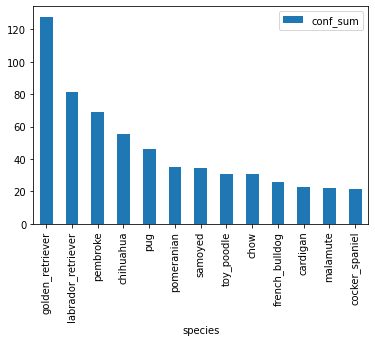

In [76]:
df_dogs[df_dogs['conf_sum'] >= 20].plot(kind = 'bar', x = 'species', y = 'conf_sum')

* `p1_conf`, `p2_conf`, and `p3_conf` can be considered as the number of dog types that appear in the image.
* The sum of confidence for each species can be viewed as an expected value for the number of species present in the overall image.

Let's find out the number of `favorite` and `retweet` by dog type

In [77]:
df_dogs['average_favorite'] = df_dogs['favorite_count'] / df_dogs['conf_sum']
df_dogs['average_retweet'] = df_dogs['retweet_count'] / df_dogs['conf_sum']

In [78]:
df_dogs2 = df_dogs[df_dogs['conf_sum'] >= 20].copy()
print(df_dogs2.shape)
df_dogs2.head()

(13, 6)


,species,conf_sum,favorite_count,retweet_count,average_favorite,average_retweet
0,golden_retriever,127.900124,1.282084e+06,420655.301360,10024.104536,3288.935837
1,labrador_retriever,81.613169,8.970266e+05,308544.480587,10991.199377,3780.572219
2,pembroke,69.170377,7.600279e+05,209117.595893,10987.765073,3023.224732
3,chihuahua,55.127765,4.048465e+05,132414.583716,7343.785732,2401.958121
4,pug,46.061516,2.202319e+05,71279.636781,4781.255879,1547.487866


In [79]:
df_dogs2[df_dogs2['average_favorite'] == df_dogs2['average_favorite'].max()]

,species,conf_sum,favorite_count,retweet_count,average_favorite,average_retweet
9,french_bulldog,25.682713,383527.443758,93686.213548,14933.291672,3647.831662


In [80]:
df_dogs2[df_dogs2['average_retweet'] == df_dogs2['average_retweet'].max()]

,species,conf_sum,favorite_count,retweet_count,average_favorite,average_retweet
6,samoyed,34.25736,374765.901016,138528.406633,10939.71942,4043.756105


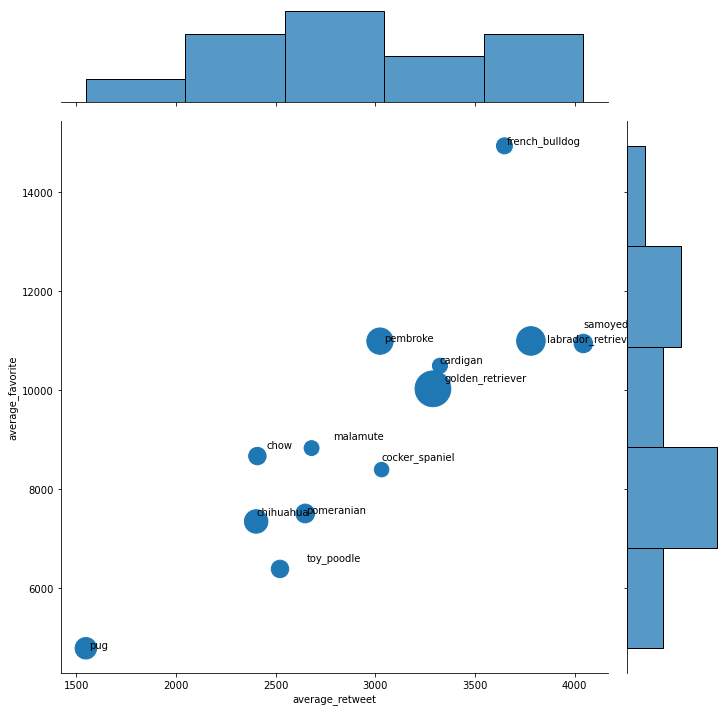

In [164]:
grid = sns.jointplot(x = 'average_retweet', y = 'average_favorite', data = df_dogs2, height = 10)
grid.ax_joint.scatter(df_dogs2['average_retweet'], df_dogs2['average_favorite'],
           s = df_dogs2['conf_sum'] * 10)

for i in range(df_dogs2.shape[0]):
    temp = df_dogs2.iloc[i]
    r = np.random.rand() * 0.03
    s1 = (np.random.rand() > 0.5) + (np.random.rand() < 0.5)
    s2 = (np.random.rand() > 0.5) + (np.random.rand() < 0.5)
    grid.ax_joint.text(temp['average_retweet'] + (s1*r * temp['average_retweet'])
                       , temp['average_favorite'] + (s2*r * temp['average_favorite']), 
                       temp['species'])
plt.show()


* People's favorite tweet is `french bulldog`.
* The tweet that people retweet the most is `samoyed`.
* The dog with the most original tweets is the `golden retriever`.